In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BreastCancer.csv', sep=',')
df.head()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [71]:
df.columns

Index(['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [72]:
X = df.drop(['Id','Class'],axis=1)
Y = df['Class']

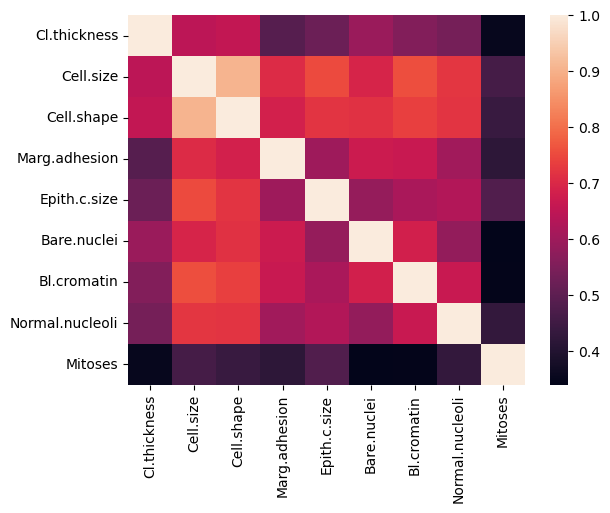

In [ ]:
import seaborn as sns
#korelasyonlara bakalım
plt.figure()
cor=X.corr()
sns.heatmap(cor)
plt.show()


In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'median' veya 'most_frequent' stratejilerini de kullanabilirsiniz
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Test setine de aynı işlemi uygulayın

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Eksik değerleri doldurmak için SimpleImputer kullanın
imputer = SimpleImputer(strategy='mean')  # 'median' veya 'most_frequent' stratejileri de kullanılabilir
X_imputed = imputer.fit_transform(X)  # X verisindeki eksik değerleri doldurun

# Veri setini ayırın
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)



clf = LinearRegression()

# Train the model on the training set
clf.fit(X_train, y_train)

# Evaluate the model on the test set
score = clf.score(X_test, y_test)
print("Accuracy:", score)



Accuracy: 0.821819002593688


In [98]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2
print("Doğruluk skoru:", accuracy_score(y_test, y_pred2))



Doğruluk skoru: 0.9714285714285714


Confusion matrix:
[[94  1]
 [ 3 42]]


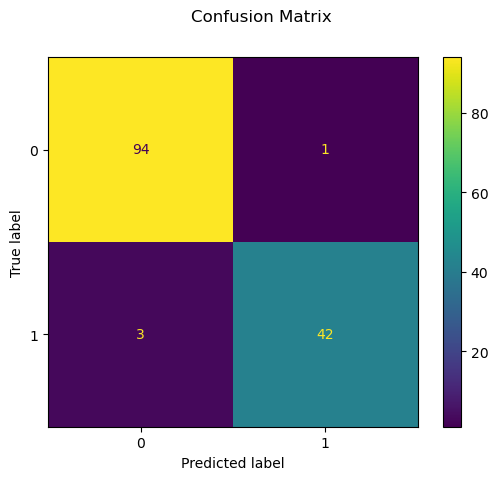

In [99]:
from sklearn import datasets, metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()